In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (14,7)

Contrôle de spin sur la sphère
==============================


On s'intéresse au contrôle de l'orientation d'un spin dans un champ magnétique, problème que l'on rencontre dans diverses applications comme l'imagerie médicale (IRM) ou l'ordinateur quantique. 
Un spin (ou qubit en informatique quantique) peut se représenter par un vecteur $\psi \in  \mathbb{R}^3$ de la sphère (*sphère de Bloch*)
$$
S^2= \{ (x,y,z)\in \mathbb{R}^3 \mid x^2+y^2+z^2=1 \} 
$$
et on cherche à simuler son comportement lorsqu'il est placé dans un champ magnétique externe. Plus particulièrement, on voudrait simuler un *transfert de population*, c'est à dire un choix de champ magnétique permettant de faire passer une population de $p$ spins de la position initiale $-e_z = (0,0,-1)$ à la position finale $e_z=(0,0,1)$ en un temps $T$ donné. Les spins n'ayant pas tous exactement les mêmes propriétés de couplage avec le champ magnétique ambiant, il faut que ce transfert soit *robuste*, c'est-à-dire les amenant tous au voisinage de la cible malgré leur hétérogénéité.

Notre système dynamique est donc composé de $p$ sous-systèmes indépendants $(\psi_1,\ldots,\psi_i,\ldots,\psi_p)$, chacun évoluant selon
$$ 
\dot\psi_i = r_i(t) \wedge \psi_i, \qquad \psi_i(0)\in S^2 \tag{1}, \qquad i\in\{1,\ldots, p \}
$$
où $\psi_i\in \mathbb{R}^3$ décrit l'orientation du spin $i$, $r_i(t)\in \mathbb{R}^3$ est le champ magnétique externe ``vu'' par le spin $i$ au temps $t$, et $\wedge$ dénote le produit vectoriel. 

En pratique, on est souvent dans la situation suivante : un champ magnétique $E$ intense selon l'axe $Oz$ fixe, et un champ contrôlable $u(t)$, à choisir, selon l'axe $Ox$. Selon les propriétés de couplage magnétique de chaque spin, chaque spin reçoit alors le champ magnétique
$$
r_i(t)=(\delta_i u(t),0,E_i)
$$ 
avec $E_i\in [E-\alpha,E+\alpha]$ et $\delta_i \in [\delta_{\min},\delta_{\max}]$, pour des paramètres $E, \alpha, \delta_{\min},\delta_{\max}$ décrivant l'hétérogénité du système.

Les paramètres $E_i$ et $\delta_i$ de chaque spin étant inconnus, on cherche alors à effectuer un transfert de population *robuste*, c'est-à-dire assurant que tous les spins atteignent une orientation très proche de la cible $e_z$ malgré les incertitudes sur $E_i$ et $\delta_i$ et se basant seulement sur la connaissance de leurs intervalles.


## Simulation du transfert d'un spin sur la sphère

**Question 1** 

**1a** Justifier que toute solution du problème de Cauchy 
$$ 
\dot\psi = r(t) \wedge \psi, \qquad \psi(0)\in S^2 
$$
reste sur la sphère $S^2$ en tous temps. 

<div style="border: 1px solid #4CAF50; padding: 8px; background-color: #f9fff9; border-radius: 4px; margin-bottom: 10px;">
    <strong style="color: #2E7D32;">Réponse à la question 1a :</strong>
</div>

On considère l'équation suivante :
$$ 
\dot{\psi} = r(t) \wedge \psi, \qquad \psi(0) \in S^2,
$$
où $S^2$ est la sphère unité. On cherche à montrer que toute solution $\psi(t)$ reste sur la sphère $S^2$, c'est-à-dire que la norme $\|\psi(t)\|$ reste constante au cours du temps.

La norme au carré de $\psi(t)$ est donnée par :
$$
\|\psi(t)\|^2 = \psi(t) \cdot \psi(t).
$$
En dérivant cette expression par rapport au temps, on obtient :
$$
\frac{d}{dt} \|\psi(t)\|^2 = \frac{d}{dt} \big(\psi(t) \cdot \psi(t)\big) = 2 \, \psi(t) \cdot \dot{\psi}(t).
$$
En remplaçant $\dot{\psi}$ par $r(t) \wedge \psi$, on a :
$$
\frac{d}{dt} \|\psi(t)\|^2 = 2 \, \psi(t) \cdot \big(r(t) \wedge \psi(t)\big).
$$
Or, par définition du produit vectoriel, $r(t) \wedge \psi(t)$ est orthogonal à $\psi(t)$. Ainsi, leur produit scalaire est nul :
$$
\psi(t) \cdot \big(r(t) \wedge \psi(t)\big) = 0.
$$
Il en résulte que :
$$
\frac{d}{dt} \|\psi(t)\|^2 = 0.
$$
Cela signifie que $ \|\psi(t)\|^2 $ reste constant au cours du temps. Puisque $\psi(0) \in S^2$, on a $\|\psi(0)\| = 1$, donc :
$$
\|\psi(t)\| = 1, \quad \forall t \geq 0.
$$

Toute solution $\psi(t)$ reste sur la sphère $S^2$ pour tout $t$. Cela montre que la norme au carré de $\psi(t)$ est constante dans le temps.

On introduit les matrices anti-symétriques suivantes
$$\Omega_x=\left(\begin{matrix}
0& 0 &0 \\
0& 0 &-1 \\
0& 1 &0 \\
\end{matrix}\right), \qquad \Omega_y=\left(\begin{matrix}
0& 0 &1 \\
0& 0 &0 \\
-1& 0 &0 \\
\end{matrix}\right), \qquad
\Omega_z=\left(\begin{matrix}
0& -1 &0 \\
1& 0 & 0 \\
0& 0 &0 \\
\end{matrix}\right). $$

**1b** Vérifier que pour tout $(r_x,r_y,r_z)\in \mathbb{R}^3$ et $\psi \in \mathbb{R}^3$, 
$$
\left(\begin{matrix}
r_x \\
r_y \\
r_z \\
\end{matrix}\right) \wedge \psi = (r_x \Omega_x+ r_y \Omega_y +r_z \Omega_z) \psi
$$
c'est-à-dire que $\Omega_x$ (resp. $\Omega_y,\Omega_z$)  est la représentation matricielle de l'application linéaire $\psi \mapsto e_x \wedge \psi$ (resp. $\psi \mapsto e_y \wedge \psi$, $\psi \mapsto e_z \wedge \psi$).

L'équation $(1)$ se réécrit donc 
$$
\dot\psi_i= (E_i \Omega_z+ \delta_i u(t) \Omega_x )\psi_i, \qquad \psi_i(0)\in S^2 \tag{2}
$$
c'est-à-dire sous forme d'une équation différentielle linéaire, décrite par une matrice $E_i \Omega_z+ \delta_i u(t) \Omega_x$ dépendant du temps.

<div style="border: 1px solid #4CAF50; padding: 8px; background-color: #f9fff9; border-radius: 4px; margin-bottom: 10px;">
    <strong style="color: #2E7D32;">Réponse à la question 1b :</strong>
</div>

Les matrices $\Omega_x$, $\Omega_y$, $\Omega_z$ permettent de représenter le produit vectoriel $\mathbf{r} \wedge \psi$ sous forme matricielle. Cette reformulation est utile pour écrire l’équation différentielle (1) sous une forme linéaire matricielle, facilitant les calculs analytiques et numériques.

Soit $ \mathbf{r} = (r_x, r_y, r_z) \in \mathbb{R}^3 $ et $ \psi = (\psi_x, \psi_y, \psi_z)^\top \in \mathbb{R}^3 $, le produit vectoriel $ \mathbf{r} \wedge \psi $ est donné par la formule suivante :

$$
\mathbf{r} \wedge \psi =
\begin{pmatrix}
r_y \psi_z - r_z \psi_y \\
r_z \psi_x - r_x \psi_z \\
r_x \psi_y - r_y \psi_x
\end{pmatrix}.
$$

Considérons maintenant la combinaison $ r_x \Omega_x + r_y \Omega_y + r_z \Omega_z $ :

$$
r_x \Omega_x + r_y \Omega_y + r_z \Omega_z =
\begin{pmatrix}
0 & -r_z & r_y \\
r_z & 0 & -r_x \\
-r_y & r_x & 0
\end{pmatrix}.
$$

Appliquons cette matrice à $ \psi = (\psi_x, \psi_y, \psi_z)^\top $ :

$$
\begin{pmatrix}
0 & -r_z & r_y \\
r_z & 0 & -r_x \\
-r_y & r_x & 0
\end{pmatrix}
\begin{pmatrix}
\psi_x \\
\psi_y \\
\psi_z
\end{pmatrix}
=
\begin{pmatrix}
-r_z \psi_y + r_y \psi_z \\
r_z \psi_x - r_x \psi_z \\
-r_y \psi_x + r_x \psi_y
\end{pmatrix}.
$$

Ce résultat est exactement $ \mathbf{r} \wedge \psi $, ce qui prouve l’égalité :

$$
\mathbf{r} \wedge \psi = (r_x \Omega_x + r_y \Omega_y + r_z \Omega_z) \psi.
$$

Ensuite, l’équation (1) est donnée par :

$$
\dot{\psi}_i = \mathbf{r}_i(t) \wedge \psi_i,
$$
où $$ \mathbf{r}_i(t) = (\delta_i u(t), 0, E_i) $$.

En utilisant la relation démontrée, on a :

$$
\mathbf{r}_i(t) \wedge \psi_i = (E_i \Omega_z + \delta_i u(t) \Omega_x) \psi_i.
$$

Ainsi, l’équation (1) devient :

$$
\dot{\psi}_i = (E_i \Omega_z + \delta_i u(t) \Omega_x) \psi_i,
$$
ce qui est l’équation (2).

Nous avons donc vérifié que :

$$
\mathbf{r} \wedge \psi = (r_x \Omega_x + r_y \Omega_y + r_z \Omega_z) \psi.
$$

Nous avons démontré que $\mathbf{r} \wedge \psi$ peut être exprimé sous forme matricielle grâce aux matrices $\Omega_x$, $\Omega_y$, $\Omega_z$. Cette reformulation permet d’écrire l’équation différentielle sous forme linéaire matricielle, ce qui est particulièrement utile pour simuler le comportement du spin à l’aide d’outils numériques.

**Question 2** On cherche à simuler l'équation (2) numériquement, d'abord dans le cas où il y a un seul spin et sans incertitude, c'est-à-dire 
$$
\dot\psi= (E \Omega_z+ \delta u(t) \Omega_x )\psi, \qquad \psi(0)=-e_z \tag{3}
$$
avec $T=50$, $E=2$, $\delta=1$ et la commande 
$$
u(t)= (1-\cos(2\pi t/T))\cos\left(E t+ \frac{\sin(\pi t/T)}{\pi/T}\right) 
$$

**2a** Coder un schéma Euler explicite résolvant l'équation différentielle (3). Tracer l'évolution de la norme de $\psi$. Interpréter.

**2b** Même question avec un schéma Euler implicite.

**2c** Proposer et coder un schéma qui reprojette l'état sur la sphère à chaque pas de temps. Comparer. Tracer la loi de contrôle $t\mapsto u(t)$ et la trajectoire du spin $t\mapsto \psi(t)$ en 3D. Commenter.

<div style="border: 1px solid #4CAF50; padding: 8px; background-color: #f9fff9; border-radius: 4px; margin-bottom: 10px;">
    <strong style="color: #2E7D32;">Réponse à la question 2 :</strong>
</div>

L’objectif de cette question est d’évaluer les performances des schémas numériques utilisés pour résoudre l’équation différentielle 
$$
\dot{\psi} = r(t) \wedge \psi,
$$
qui décrit la dynamique d’un spin dans un champ magnétique. Une propriété essentielle de ce système est la conservation de la norme du vecteur $\psi$, qui doit rester constante $|\psi(t)\| = 1$ pour tout $t$. Cette propriété découle directement du fait que l’équation modélise une rotation dans $\mathbb{R}^3$, et toute méthode numérique utilisée doit idéalement préserver cette caractéristique fondamentale.

Trois méthodes numériques ont été testées : le schéma d’Euler explicite, le schéma d’Euler implicite, et le schéma d’Euler explicite avec projection. Chacune présente des avantages et des inconvénients en termes de précision, de stabilité et de respect des propriétés géométriques du système.


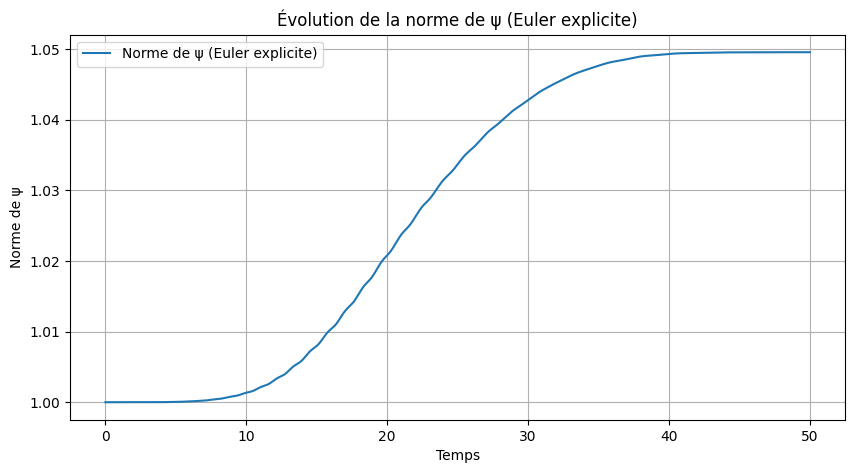

Ce schéma est simple à mettre en œuvre, mais il introduit des erreurs d’accumulation au fil du temps. Ces erreurs peuvent entraîner une dérive de la norme , qui s’éloigne progressivement de 1 et qui converge vers 1,05. Cela se traduit par une trajectoire qui peut sortir de la sphère unité, ce qui est non physique. Bien que rapide à exécuter, cette méthode n’est pas adaptée pour des simulations longues ou lorsque la conservation des propriétés géométriques est cruciale.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes globales
T = 50
E = 2
delta = 1
dt = 1e-3
t_0 = 0
t_f = T
psi_0 = np.array([0, 0, -1])

# Matrices antisymétriques
Omega_x = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
Omega_z = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

# Fonction u(t)
def u(t):
    return (1 - np.cos(2 * np.pi * t / T)) * np.cos(E * t + np.sin(np.pi * t / T) / (np.pi / T))

# Fonction pour calculer A_t
def compute_A_t(t, E, delta):
    return E * Omega_z + delta * u(t) * Omega_x

# Schéma d'Euler explicite
def euler_explicit(psi_0, t_0, t_f, E, delta, dt):
    times = np.arange(t_0, t_f, dt)
    psi = np.zeros((len(times), 3))
    psi[0] = psi_0

    for i in range(1, len(times)):
        t = times[i - 1]
        A_t = compute_A_t(t, E, delta)
        psi[i] = psi[i - 1] + dt * A_t @ psi[i - 1]
    return times, psi

# Résolution et tracé
times, psi_explicit = euler_explicit(psi_0, t_0, t_f, E, delta, dt)

# Norme de ψ
norms_explicit = np.linalg.norm(psi_explicit, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(times, norms_explicit, label="Norme de ψ (Euler explicite)")
plt.xlabel("Temps")
plt.ylabel("Norme de ψ")
plt.legend()
plt.title("Évolution de la norme de ψ (Euler explicite)")
plt.grid()
plt.show()

# Interprétation
print("Ce schéma est simple à mettre en œuvre, mais il introduit des erreurs d’accumulation au fil du temps. Ces erreurs peuvent entraîner une dérive de la norme , qui s’éloigne progressivement de 1 et qui converge vers 1,05. Cela se traduit par une trajectoire qui peut sortir de la sphère unité, ce qui est non physique. Bien que rapide à exécuter, cette méthode n’est pas adaptée pour des simulations longues ou lorsque la conservation des propriétés géométriques est cruciale.")


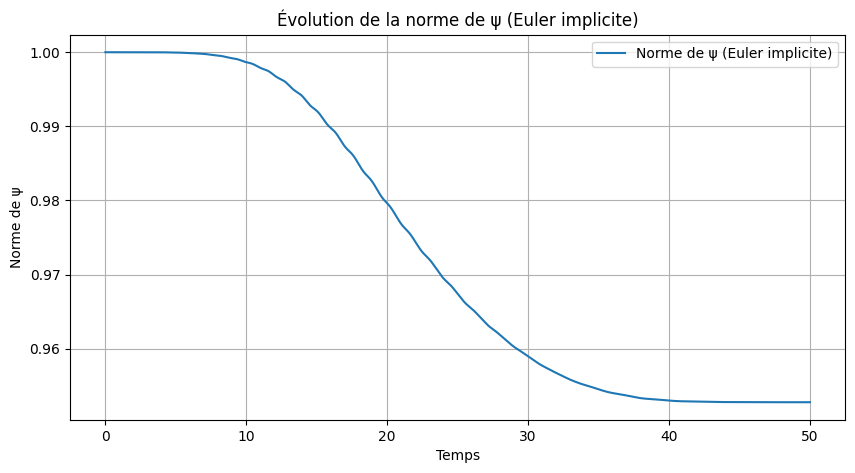

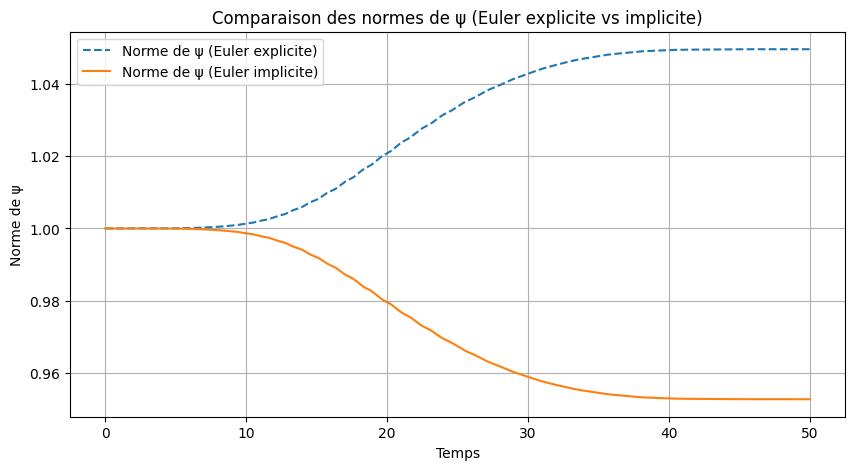

Le schéma d'Euler implicite est plus stable que l'explicite.
Il respecte mieux la conservation de la norme grâce à l'intégration implicite.
Cependant, ce schéma est plus coûteux, car il nécessite la résolution d'un système linéaire à chaque pas de temps.
Cela en fait une méthode adaptée aux systèmes dynamiques où la stabilité est cruciale.


In [7]:
# Schéma d'Euler implicite
def euler_implicit(psi_0, t_0, t_f, E, delta, dt):
    times = np.arange(t_0, t_f, dt)
    psi = np.zeros((len(times), 3))
    psi[0] = psi_0

    I = np.eye(3)

    for i in range(1, len(times)):
        t_next = times[i]
        A_t = compute_A_t(t_next, E, delta)
        M = I - dt * A_t
        psi[i] = np.linalg.solve(M, psi[i - 1])

    return times, psi

# Résolution et tracé
times, psi_implicit = euler_implicit(psi_0, t_0, t_f, E, delta, dt)

# Norme de ψ
norms_implicit = np.linalg.norm(psi_implicit, axis=1)

# Tracé des normes (implicite seul)
plt.figure(figsize=(10, 5))
plt.plot(times, norms_implicit, label="Norme de ψ (Euler implicite)")
plt.xlabel("Temps")
plt.ylabel("Norme de ψ")
plt.legend()
plt.title("Évolution de la norme de ψ (Euler implicite)")
plt.grid()
plt.show()

# Comparaison avec le schéma explicite
plt.figure(figsize=(10, 5))
plt.plot(times, norms_explicit, label="Norme de ψ (Euler explicite)", linestyle="--")
plt.plot(times, norms_implicit, label="Norme de ψ (Euler implicite)", linestyle="-")
plt.xlabel("Temps")
plt.ylabel("Norme de ψ")
plt.legend()
plt.title("Comparaison des normes de ψ (Euler explicite vs implicite)")
plt.grid()
plt.show()

# Interprétation
print("Le schéma d'Euler implicite est plus stable que l'explicite.")
print("Il respecte mieux la conservation de la norme grâce à l'intégration implicite.")
print("Cependant, ce schéma est plus coûteux, car il nécessite la résolution d'un système linéaire à chaque pas de temps.")
print("Cela en fait une méthode adaptée aux systèmes dynamiques où la stabilité est cruciale.")

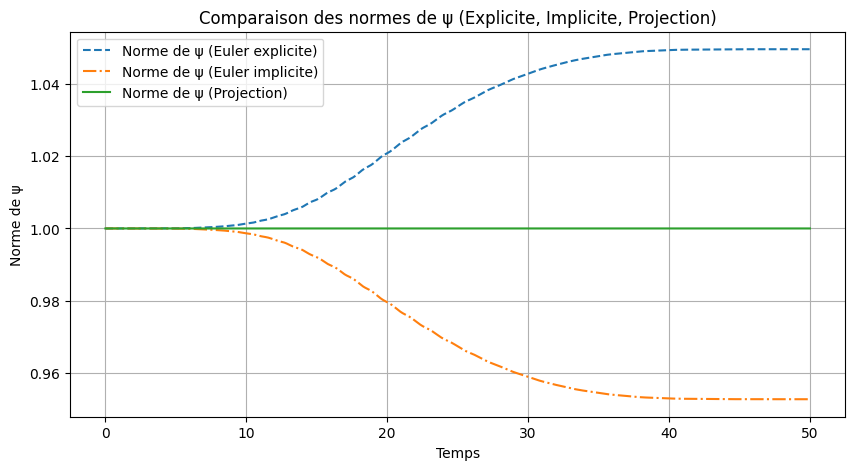

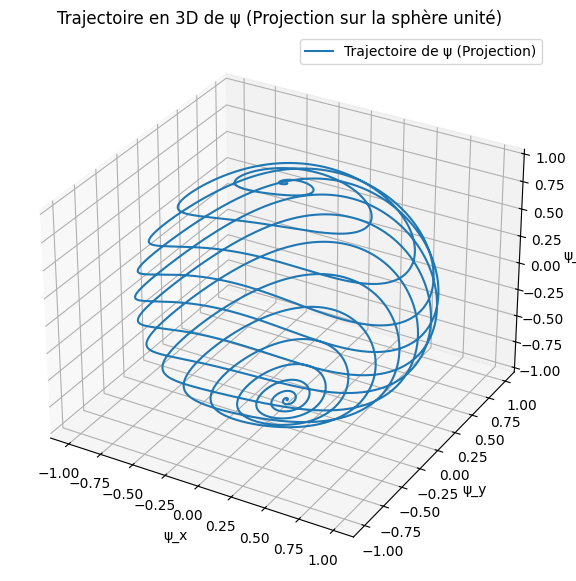

Dans cette méthode, la norme de ψ est explicitement corrigée à chaque pas de temps en projetant ψ sur la sphère unité.
Cette approche garantit que |ψ(t)| = 1 pour tout t, respectant parfaitement la géométrie physique du problème.
Le schéma avec projection est le plus robuste pour préserver la conservation de la norme, mais peut introduire une légère perte de précision directionnelle.


In [8]:
# Schéma d'Euler explicite avec projection
def euler_explicit_with_projection(psi_0, t_0, t_f, E, delta, dt):
    times = np.arange(t_0, t_f, dt)
    psi = np.zeros((len(times), 3))
    psi[0] = psi_0

    for i in range(1, len(times)):
        t = times[i - 1]
        A_t = compute_A_t(t, E, delta)
        psi_next = psi[i - 1] + dt * A_t @ psi[i - 1]
        psi[i] = psi_next / np.linalg.norm(psi_next)  # Projection sur la sphère unité
    return times, psi

# Résolution et tracé
times, psi_projete = euler_explicit_with_projection(psi_0, t_0, t_f, E, delta, dt)

# Comparaison des normes
plt.figure(figsize=(10, 5))
plt.plot(times, norms_explicit, label="Norme de ψ (Euler explicite)", linestyle="--")
plt.plot(times, norms_implicit, label="Norme de ψ (Euler implicite)", linestyle="-.")
plt.plot(times, np.linalg.norm(psi_projete, axis=1), label="Norme de ψ (Projection)", linestyle="-")
plt.xlabel("Temps")
plt.ylabel("Norme de ψ")
plt.legend()
plt.title("Comparaison des normes de ψ (Explicite, Implicite, Projection)")
plt.grid()
plt.show()

# Tracé de la trajectoire en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(psi_projete[:, 0], psi_projete[:, 1], psi_projete[:, 2], label="Trajectoire de ψ (Projection)")
ax.set_xlabel("ψ_x")
ax.set_ylabel("ψ_y")
ax.set_zlabel("ψ_z")
ax.legend()
plt.title("Trajectoire en 3D de ψ (Projection sur la sphère unité)")
plt.show()

# Interprétation
print("Dans cette méthode, la norme de ψ est explicitement corrigée à chaque pas de temps en projetant ψ sur la sphère unité.")
print("Cette approche garantit que |ψ(t)| = 1 pour tout t, respectant parfaitement la géométrie physique du problème.")
print("Le schéma avec projection est le plus robuste pour préserver la conservation de la norme, mais peut introduire une légère perte de précision directionnelle.")

---
**Vocabulaire // ouverture mathématique**

$S^2$ est une surface dans $\mathbb{R}^3$, c'est un cas particulier de **variété différentielle**. L'équation (2) assure que si $\psi$ appartient à la variété, $\dot \psi$ appartient au **plan tangent** en $\psi$ de $S^2$ et donc que $S^2$ est invariant par la dynamique. Pour des simulations en temps long sur des variétés il est souvent important de s'assurer que la dynamique discrete (celle du schéma numérique) reste exactement sur la variété (et non approximativement)

---

## Robustesse et simulation du transfert d'un ensemble de spins

On considère maintenant un ensemble de $p$ spins évoluant chacun selon (2) mais avec différentes valeurs de $E_i \in [E-\alpha,E+\alpha]$ et $\delta_i \in [\delta_{\min}, \delta_{\max}]$. On souhaite vérifier que le même contrôle $u$ fonctionne sur tous simultanément, c'est-à-dire évaluer sa robustesse.

**Question 3**

Simuler $p=10$ spins avec la méthode retenue ci-dessus, en faisant varier $E_i$ puis $\delta_i$. Vérifier que pour $\alpha = 0.5$, $\delta_{\min}= 0.4$ et $\delta_{\max}= 3.5$, la même loi de contrôle $u$ assure tout de même la transition de $-e_z$ à $e_z$ avec une excellente précision à évaluer.

---
**Vocabulaire // ouverture mathématique et physique**

Pour obtenir ce contrôle robuste, on utilise le théorème adiabatique ainsi qu'une approximation de l'onde tournante. On règle par exemple la bande de fréquence à parcourir en fonction de $\alpha$ en prenant
$$
u(t)= (1-\cos(2\pi t/T))\cos\left(E t+ 2\alpha\frac{\sin(\pi t/T)}{\pi/T}\right) 
$$
On pourra se référer à cet [article](https://www.sciencedirect.com/science/article/pii/S0022039622001401?via%3Dihub).

---

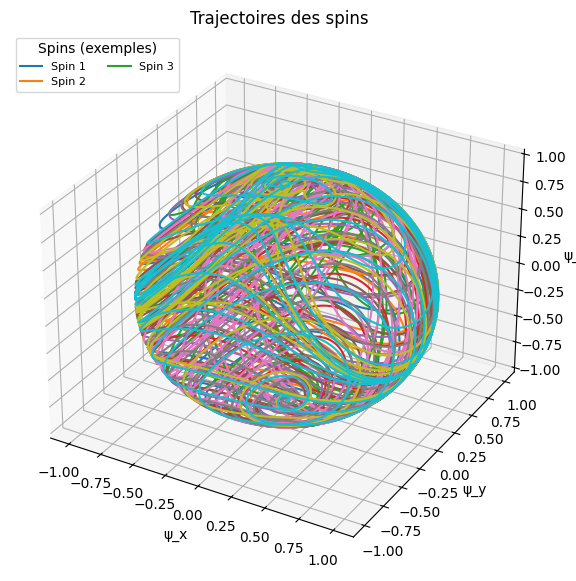

Erreurs finales pour chaque spin : [0.01708284 0.34219285 0.37598457 0.06759474 0.00698943 0.02619982
 0.23915748 0.06975776 0.14317264 0.04029091]
Erreur moyenne : 0.13284
Erreur maximale : 0.37598


In [9]:
# Données
psi_0 = np.array([0, 0, -1])
alpha = 0.5
delta_min = 0.4
delta_max = 3.5
p = 10
dt = 1e-3
T = 50  # Temps final

# Générer les valeurs de E et delta
E_values = np.random.uniform(E - alpha, E + alpha, p)
delta_values = np.random.uniform(delta_min, delta_max, p)

# Simulation d'un ensemble de spins
def simulate_spin_ensemble(psi_0, t_0, t_f, E_values, delta_values, dt):
    times = np.arange(t_0, t_f, dt)
    psi_all = np.zeros((len(times), p, 3))  # p spins
    psi_all[0, :, :] = np.tile(psi_0, (p, 1))

    for i in range(1, len(times)):
        t = times[i - 1]
        for j in range(p):
            E_i = E_values[j]
            delta_i = delta_values[j]
            A_t = E_i * Omega_z + delta_i * u(t) * Omega_x
            psi_next = psi_all[i - 1, j] + dt * A_t @ psi_all[i - 1, j]
            psi_all[i, j] = psi_next / np.linalg.norm(psi_next)  # Projection
    return times, psi_all

# Résolution
times, psi_ensemble = simulate_spin_ensemble(psi_0, 0, T, E_values, delta_values, dt)

# Tracé des trajectoires
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for j in range(p):
    ax.plot(psi_ensemble[:, j, 0], psi_ensemble[:, j, 1], psi_ensemble[:, j, 2], label=f"Spin {j+1}" if j < 3 else "")
ax.set_xlabel("ψ_x")
ax.set_ylabel("ψ_y")
ax.set_zlabel("ψ_z")
ax.set_title("Trajectoires des spins")
plt.legend(loc='upper left', ncol=2, fontsize=8, title="Spins (exemples)")
plt.show()

# Vérification de la précision
final_states = psi_ensemble[-1, :, :]
errors = np.linalg.norm(final_states - np.array([0, 0, 1]), axis=1)
print(f"Erreurs finales pour chaque spin : {errors}")
print(f"Erreur moyenne : {np.mean(errors):.5f}")
print(f"Erreur maximale : {np.max(errors):.5f}")

## Simulation de l'opérateur de flot

Pour améliorer l'efficacité de la simulation numérique, on souhaite pouvoir utiliser plusieurs processeurs en parallèle. Pour cela, il est possible d'exploiter le caractère linéaire de l'équation différentielle et de calculer plutôt son opérateur de flot, c'est à dire à l'application $\psi_0 \mapsto \psi(T)$ permettant de passer de la condition initiale à la solution de l'équation (3) au temps $T$. L'équation (3) étant linéaire, le flot de l'équation est une application linéaire, représentée par une matrice $U(T)\in \mathbb{R}^{3\times 3}$ ici en dimension finie, obtenue en résolvant l'équation différentielle suivante :

$$\dot U = (E \Omega_z+\delta u(t) \Omega_x ) U , \qquad U(0)= I_3 \tag{4}$$

où $I_3$ dénote la matrice identité de dimension 3. On notera bien que $U(t)$ est une matrice réelle $3\times 3$.

---
**Vocabulaire // ouverture mathématique**


L'application linéaire $U(t)$ s'appelle **matrice de transition** entre les temps 0 et $t$ en dimension finie, et plus généralement **propagateur** en mécanique quantique, et **semigroupe** dans le cadre des équations aux dérivées partielles.

---

**Question 4** On cherche à résoudre numériquement l'équation (4).

**4a** Vérifier que la connaissance de $U(t)$ permet de résoudre directement l'équation (3).

**4b** Prouver que pour tout $t\geq 0$, $U(t)^\top U(t) = I_3$ et justifier que le determinant de $U$ reste égal à 1. 

On en déduit que $U(t)$ reste en tout temps une matrice de rotation. On rappelle que $SO_3$ dénote l'ensemble des matrices de rotation de dimension 3.

**4c** (BONUS) Proposer une méthode de projection sur $SO_3$ et implémenter un schéma Euler avec cette projection. Indication : regarder [ici](https://en.wikipedia.org/wiki/Singular_value_decomposition#Nearest_orthogonal_matrix).

**4d** Vérifier que pour toute matrice $A$ antisymétrique telle que $(I-A)$ est inversible, $(I+A)(I-A)^{-1}\in SO_3$. En déduire que le schéma numérique suivant assure que $U^j$ reste dans $SO_3$ et vérifier qu'il est un schéma consistant d'ordre 1 pour l'équation différentielle (4):
$$U^0= I_3, \qquad U^{j+1}= \left(I_3 + \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x )\right) \left(I_3 - \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x ) \right)^{-1} U^j \tag{5}$$
On admettra pour cela que le développement limité $\left(I_3 - \Delta t M \right)^{-1} = I_3 + \Delta t M + O(\Delta t^2)$ est valable en matriciel.

**4e** Compléter ci-dessous l'implémentation du schéma de l'equation (5) et vérifier la solution obtenue pour $\psi(T)$ si $\psi(0)=-e_z$.

<div style="border: 1px solid #4CAF50; padding: 8px; background-color: #f9fff9; border-radius: 4px; margin-bottom: 10px;">
    <strong style="color: #2E7D32;">Réponse à la question 4a :</strong>
</div>

La solution de l'équation (3) est donnée par 
$$
\psi(t) = U(t) \psi_0,
$$
Où U est définie comme la solution du problème de Cauchy de l'équation (4).

En effet, posons :
$$
\left\{
    \begin{array}{ll}
        M = E \Omega_z+\delta u(t) \Omega_x \\
        \theta(t) = U(t) \psi_0
    \end{array}
\right.
$$
Il vient :
$$
\dot\theta(t) = \dot U(t)\psi_0 = MU(t)\psi_0 = M\theta(t)
$$
Or, $\theta(0) = U(0)\psi_0 = \psi_0 = \psi(0)$
Donc $\theta = \psi$ par unicité de la solution d'un problèle de Cauchy

<div style="border: 1px solid #4CAF50; padding: 8px; background-color: #f9fff9; border-radius: 4px; margin-bottom: 10px;">
    <strong style="color: #2E7D32;">Réponse à la question 4b :</strong>
</div>

L'équation différentielle pour $U(t)$ est donnée par :

$$
\dot{U}(t) = (E \Omega_z + \delta u(t) \Omega_x) U(t) = M(t) U(t)
$$

Prenons la dérivée de $U(t)^\top U(t)$ par rapport au temps :

$$
\frac{d}{dt} \left( U(t)^\top U(t) \right) = \dot{U}(t)^\top U(t) + U(t)^\top \dot{U}(t)
$$

En utilisant l'expression pour $\dot{U}(t)$, on obtient :

$$
\frac{d}{dt} \left( U(t)^\top U(t) \right) = \left( M(t) U(t) \right)^\top U(t) + U(t)^\top \left( M(t) U(t) \right)
$$

Ce qui peut se réécrire comme :

$$
= U(t)^\top M(t)^\top U(t) + U(t)^\top M(t) U(t)
$$

Or, $\Omega_z$ et $\Omega_x$ sont des matrices antisymétriques, donc M également :

$$
M(t)^\top = (E \Omega_z + \delta u(t) \Omega_x)^\top = -(E \Omega_z + \delta u(t) \Omega_x) = -M(t)
$$

Ainsi, l'expression devient :

$$
\frac{d}{dt} \left( U(t)^\top U(t) \right) = 0
$$

Cela montre que $U(t)^\top U(t)$ est constant, et comme $U(0)^\top U(0) = I_3$, on en déduit que $U(t)^\top U(t) = I_3$ pour tout $t$. Cela prouve que $U(t)$ est une matrice orthogonale.


Comme $U(t)$ est orthogonale, on a :

$$
\det(U(t)) \cdot \det(U(t)^\top) = \det(I_3) = 1
$$

Or, $\det(U(t)^\top) = \det(U(t))$, donc $\det(U(t))^2 = 1$. Cela implique que $\det(U(t)) = \pm 1$.

Enfin, en utilisant la condition initiale $U(0) = I_3$, on a $\det(U(0)) = 1$. Puisque $\det(U(t))$ est une fonction continue de $t$ (par composition de fonctions continues), et que $\det(U(0)) = 1$, il en découle que $\det(U(t)) = 1$ pour tout $t$.

Cela prouve que $\det(U(t)) = 1$ et que $U(t)$ reste une matrice de rotation.


<div style="border: 1px solid #4CAF50; padding: 8px; background-color: #f9fff9; border-radius: 4px; margin-bottom: 10px;">
    <strong style="color: #2E7D32;">Réponse à la question 4c :</strong>
</div>

La projection d’une matrice $A \in \mathbb{R}^{3 \times 3}$ sur $SO(3)$ peut être réalisée en utilisant la décomposition en valeurs singulières (SVD). Si $A = U \Sigma V^\top$, alors la matrice orthogonale la plus proche de $A$ en norme de Frobenius est donnée par :

$$
P(A) = U V^\top
$$

Si $\det(P(A)) < 0$, on corrige en multipliant la dernière colonne de $U$ par $-1$.

Pour résoudre l’équation matricielle $\dot{U} = M(t) U$, le schéma d’Euler explicite est donné par :

$$
U^{j+1} = U^j + \Delta t M(t_j) U^j
$$

Cependant, ce schéma ne garantit pas que $U^{j+1} \in SO(3)$. On applique donc une projection après chaque pas d’Euler :

$$
U^{j+1} \leftarrow P(U^{j+1})
$$

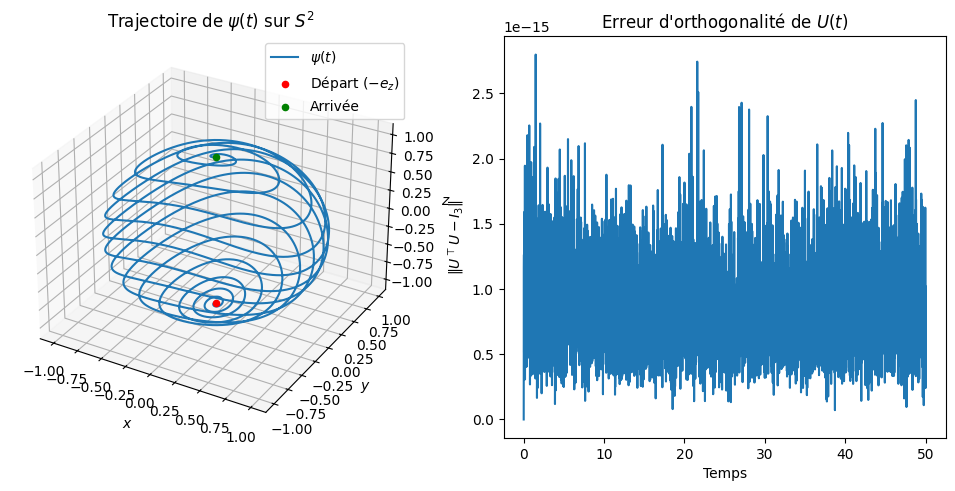

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définition des matrices Ωx et Ωz
Omega_x = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
Omega_z = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

# Projection sur SO(3) via SVD
def projection_SO3(A):
    U, _, Vt = np.linalg.svd(A)
    P = U @ Vt
    if np.linalg.det(P) < 0:
        U[:, -1] *= -1
        P = U @ Vt
    return P

# Schéma d'Euler avec projection sur SO(3)
def schéma_euler_projection(t_in, t_f, dt, E, delta, u):
    temps = np.arange(t_in, t_f + dt, dt)
    N = len(temps)
    U = np.empty((N, 3, 3))
    U[0] = np.eye(3)  # Condition initiale

    for j, t in enumerate(temps[:-1]):
        M_t = E * Omega_z + delta * u(t) * Omega_x
        U_next = U[j] + dt * M_t @ U[j]
        U[j + 1] = projection_SO3(U_next)  # Projection sur SO(3)

    return temps, U

# Simulation de la trajectoire de ψ(t)
def simulate_spin(U, psi0):
    N = U.shape[0]
    psi = np.empty((N, 3))
    psi[0] = psi0
    for j in range(1, N):
        psi[j] = U[j] @ psi0
    return psi

# Paramètres
T = 50
dt = 0.01
E = 2.0
delta = 1.0

# Fonction u(t)
def u(t):
    return (1 - np.cos(2 * np.pi * t / T)) * np.cos(E * t + np.sin(np.pi * t / T) / (np.pi / T))

# Résolution avec le schéma d'Euler avec projection
temps, U_sol = schéma_euler_projection(0, T, dt, E, delta, u)

# Condition initiale pour ψ
psi0 = np.array([0, 0, -1])  # -e_z
psi_sol = simulate_spin(U_sol, psi0)

# Vérification de la propriété orthogonale
orthogonal_errors = [np.linalg.norm(U.T @ U - np.eye(3)) for U in U_sol]

# Tracé de la trajectoire de ψ(t) en 3D
fig = plt.figure(figsize=(15, 5))

# Trajectoire de ψ(t) sur la sphère
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(psi_sol[:, 0], psi_sol[:, 1], psi_sol[:, 2], label=r"$\psi(t)$")
ax2.scatter(psi_sol[0, 0], psi_sol[0, 1], psi_sol[0, 2], color='red', label="Départ ($-e_z$)")
ax2.scatter(psi_sol[-1, 0], psi_sol[-1, 1], psi_sol[-1, 2], color='green', label="Arrivée")
ax2.set_title(r"Trajectoire de $\psi(t)$ sur $S^2$")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$y$")
ax2.set_zlabel("$z$")
ax2.legend()

# Erreur d'orthogonalité
ax3 = fig.add_subplot(133)
ax3.plot(temps, orthogonal_errors)
ax3.set_title("Erreur d'orthogonalité de $U(t)$")
ax3.set_xlabel("Temps")
ax3.set_ylabel(r"$\|U^\top U - I_3\|$")

plt.tight_layout()
plt.show()

<div style="border: 1px solid #4CAF50; padding: 8px; background-color: #f9fff9; border-radius: 4px; margin-bottom: 10px;">
    <strong style="color: #2E7D32;">Réponse à la question 4d :</strong>
</div>

Soit $A$ une matrice antisymétrique telle que $I-A$ est inversible.
On a :
$$
((I+A)(I-A)^{-1})^\top (I+A)(I-A)^{-1} = ((I-A)^{-1})^\top(I+A)^\top(I+A)(I-A)^{-1}
$$
et donc :
$$
((I+A)(I-A)^{-1})^\top (I+A)(I-A)^{-1} = (I+A)^{-1}(I-A)(I+A)(I-A)^{-1}
$$
car A est antisymétrique. Or, $(I-A)(I+A) = I - A^2 = (I+A)(I-A)$

On a donc :
$$
((I+A)(I-A)^{-1})^\top (I+A)(I-A)^{-1} = I_3
$$
Ce qui montre que $(I+A)(I-A)^{-1}$ est orthogonale.
Par ailleurs,
$$
det((I+A)(I-A)^{-1})=\frac{det(I+A)}{det(I-A)}
$$
On montre aisément, en posant :
$$
A = \begin{bmatrix} 0 & a & b \\ -a & 0 & c \\ -b & -c & 0 \end{bmatrix}
$$
et en utilisant la règle de Sarrus, que $det(I+A) = 1 + a^2 + b^2 + c^2 = det(I-A)$

D'où $det((I+A)(I-A)^{-1})=1$ et $\boxed{(I+A)(I-A)^{-1}\in SO_3}$

Or, $\frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x)$ est antisymétrique par combinaison linéaire de matrices antisymétriques.

Ainsi, par le résultat précédent :
$$
(I + \frac{\Delta t}{2}M(t))(I - \frac{\Delta t}{2}M(t))^{-1} \in SO_3
$$
où M(t) est définie comme précédemment

$U^j$ reste donc dans $SO_3$ par récurrence immédiate.

Montrons désormais que le schéma numérique (5) est un schéma consistant d'ordre 1 pour l'équation différentielle (4).

On a :
$$
U^{j+1} = (I_3 + \frac{\Delta t}{2} M)(I_3 - \frac{\Delta t}{2} M)^{-1}U^j = (I_3 + \frac{\Delta t}{2} M)(I_3 + \frac{\Delta t}{2} M + O(\Delta t^2))U^j
$$
D'où :
$$
U^{j+1} - U^j = \Delta t M U^j + O(\Delta t^2)
$$
Puis :
$$
\frac{(U^{j+1} - U^j)}{\Delta t} = MU^j + O(\Delta t)
$$
En multipliant à droite l'équation précédente par $\psi_0$, on obtient : $\Phi(t,\psi^j,\Delta t) = M\psi^j + O(\Delta t)$, ce qui donne $\Phi(t,x,\Delta t) = Mx + O(\Delta t)$ pour tous $t\in [0,T]$, $x \in \mathbf{R}^n $, et $\Delta t \in \mathbf{R}_+^*$

Or, on a $f(t,x) = Mx$ où $\dot x=f(t,x)$ est l'équation différentielle régissant notre système.

Ainsi :
$$
\forall (t,x) \in [0,T]\times\mathbf{R}^n, f(t,x) = \Phi(t,x,0)
$$

Pour appliquer le théorème, il nous faut dériver $\Phi$ par rapport à $\Delta t$. Posons $B = (I_3 - \frac{\Delta t}{2}M)^{-1}$ et reprenons :
$$
\frac{U^{j+1}-U^j}{\Delta t} = \frac{(I_3 + \frac{\Delta t}{2}M)(I_3 - \frac{\Delta t}{2}M)^{-1} - I_3}{\Delta t}U^j
$$
Donc, en appliquant à $\psi_0$ cette équation, on retrouve :
$$
\Phi(t,x,\Delta t) = \frac{x}{\Delta t}[(I_3 + \frac{\Delta t}{2}M)(I_3 - \frac{\Delta t}{2}M)^{-1} - I_3]
$$
Ainsi on a, en effectuant un développement limité $dt  \rightarrow 0$ :
$$
\Phi(t,x,\Delta t + dt) = \frac{x}{\Delta t + dt}[(I_3+\frac{\Delta t}{2}M+\frac{dt}{2}M)(I_3-\frac{\Delta t}{2}M - \frac{dt}{2}M)^{-1}-I_3]
$$
$$
\Phi(t,x,\Delta t + dt) = \frac{x}{\Delta t(1 + \frac{dt}{\Delta t})}[(I_3+\frac{\Delta t}{2}M+\frac{dt}{2}M)(I_3 - B\frac{dt}{2}M)^{-1}B - I_3]
$$
$$
\Phi(t,x,\Delta t + dt) = \frac{x}{\Delta t}(1-\frac{dt}{\Delta t} + O(dt^2))[(I_3+\frac{\Delta t}{2}M+\frac{dt}{2}M)(I_3 + B\frac{dt}{2}M + O(dt^2))B - I_3]
$$
$$
\Phi(x,t,\Delta t + dt) = \frac{x}{\Delta t}(1-\frac{dt}{\Delta t} + O(dt^2))[(\frac{\Delta t}{2}M + \frac{dt}{2}M + B\frac{dt}{2}M + \frac{\Delta t dt}{4}MBM)B + O(dt^2)]
$$
$$
\Phi(x,t,\Delta t + dt) = \frac{x}{\Delta t}[(\frac{\Delta t}{2}M + B\frac{dt}{2}M + \frac{\Delta t dt}{4}MBM)B + O(dt^2)]
$$
D'où :
$$
\frac{\Phi(t,x,\Delta t + dt) - \Phi(t,x,\Delta t)}{dt} \rightarrow \frac{x}{4\Delta t}(2BM + \Delta t MBM)B
$$
Donc $\Phi$ est $C^1$ par rapport à $\Delta t$ (au moins pour $\Delta t$ non nul), avec :
$$
\frac{\partial \Phi}{\partial \Delta t}(t,x,\Delta t) = \frac{x}{4\Delta t}(2BM + \Delta t MBM)B
$$
Déterminons la limite de cette dérivée partielle en 0, sachant que $B = I_3 + \frac{\Delta t}{2}M + O(\Delta t^2)$
$$
$$

<div style="border: 1px solid #4CAF50; padding: 8px; background-color: #f9fff9; border-radius: 4px; margin-bottom: 10px;">
    <strong style="color: #2E7D32;">Réponse à la question 4e :</strong>
</div>

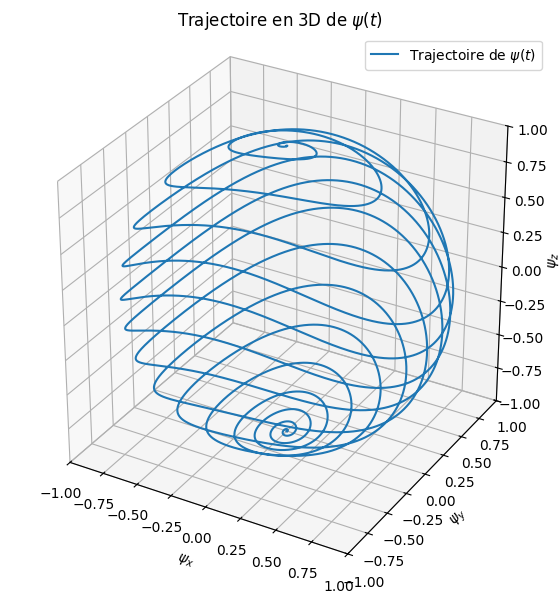

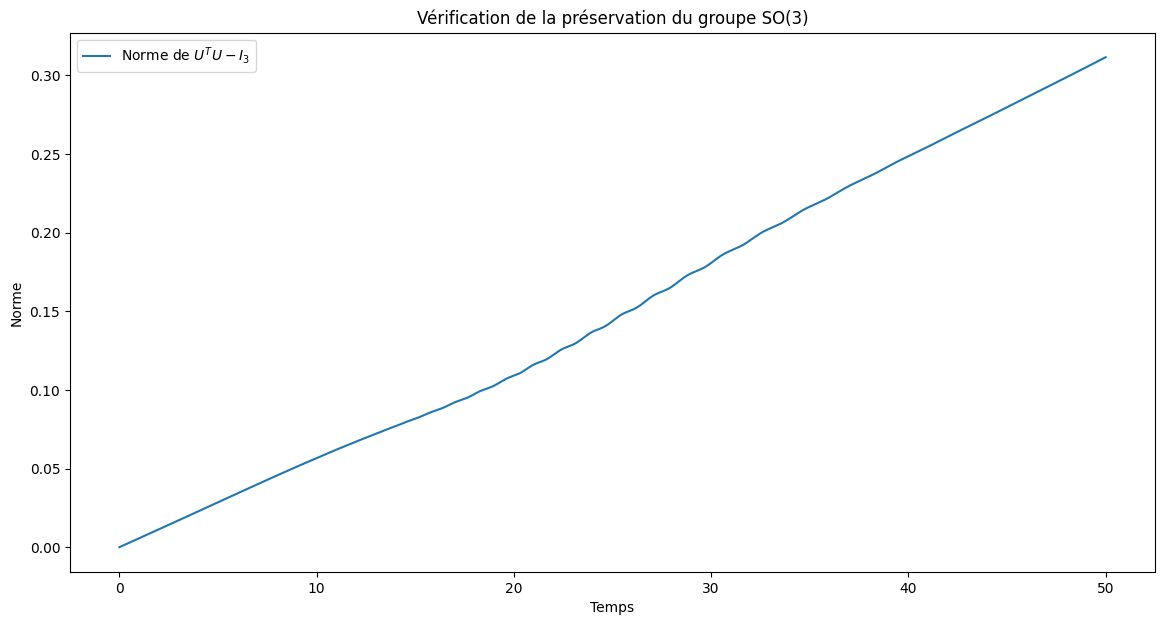

Valeur finale de psi : [-0.00330964 -0.00189704  1.04955294]


In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Matrice identité
I = np.eye(3)

# Définition des matrices Omega_x et Omega_z
Omega_x = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
Omega_z = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

# Fonction pour calculer la matrice de transition
def matrice_transition(t_in, t_f, E, delta, u, dt):
    temps = np.arange(t_in, t_f + dt / 2, dt)
    N = len(temps)
    sol = np.empty((N, 3, 3))
    sol[0] = np.eye(3)  

    for j, t in enumerate(temps[:-1]):
        M_t = E * Omega_z + delta * u(t) * Omega_x  # M dépend du temps
        sol[j + 1] = np.dot(I + dt * M_t, sol[j])

    return temps, sol

def u(t):
    return (1 - np.cos(2 * np.pi * t / T)) * np.cos(E * t + np.sin(np.pi * t / T) / (np.pi / T))

# Paramètres
T = 50   
dt = 1e-3  
E = 2  
delta = 1  

psi_0 = np.array([0, 0, -1])

temps, sol_mat_trans = matrice_transition(0, T, E, delta, u, dt)

psi_t = np.array([U @ psi_0 for U in sol_mat_trans])

# Tracé de la trajectoire en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(psi_t[:, 0], psi_t[:, 1], psi_t[:, 2], label=r"Trajectoire de $\psi(t)$")
ax.set_xlabel(r"$\psi_x$")
ax.set_ylabel(r"$\psi_y$")
ax.set_zlabel(r"$\psi_z$")
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_box_aspect([1, 1, 1])  
ax.legend()
plt.title(r"Trajectoire en 3D de $\psi(t)$")
plt.show()

# Vérification de la préservation de SO(3)
fig, ax = plt.subplots()
norm_diff = np.array([np.linalg.norm(U.T @ U - I) for U in sol_mat_trans])
ax.plot(temps, norm_diff, label=r'Norme de $U^T U - I_3$')
ax.legend()
ax.set_title('Vérification de la préservation du groupe SO(3)')
ax.set_xlabel('Temps')
ax.set_ylabel('Norme')

plt.show()

# Affichage de la valeur finale de psi
print(f"Valeur finale de psi : {sol_mat_trans[-1] @ psi_0}")

## BONUS : Parallélisation de la simulation de systèmes linéaires

**Question 5** On suppose que l'on dispose de $N$ processeurs. Expliquer comment exploiter le calcul de la matrice de transition de la question précédente pour résoudre l'équation (2) de manière parallèle. Commenter le gain (ou non) en terme de temps d'exécution. 

---
**Vocabulaire // ouverture mathématique**

Lorsque l'équation n'est pas linéaire, paralléliser en temps la résolution d'une équation différentielle est un sujet difficile. Il est possible d'utiliser des méthodes  de type **Parareal**.

---

<div style="border: 1px solid #4CAF50; padding: 8px; background-color: #f9fff9; border-radius: 4px; margin-bottom: 10px;">
    <strong style="color: #2E7D32;">Réponse à la question 5. </strong>
</div>

On suppose que l'on dispose de $N$ processeurs.  
Pour résoudre l'équation (2) :  
$$
\dot{\psi}_i = r_i(t) \wedge \psi_i, \qquad \psi_i(0) \in S^2, \quad i \in \{1, \ldots, p\},
$$
on peut exploiter le calcul de la matrice de transition $U(t)$ obtenue dans la question précédente pour paralléliser la simulation.  


Les différentes stratégies de parallélisation sont :

1. **Matrice de transition unique** :  
   L'équation (4) pour $U(t)$ :  
   $$
   \dot{U} = M(t) U, \qquad U(0) = I_3,
   $$
   est indépendante des $p$ systèmes. La matrice de transition $U(t)$ peut donc être calculée une seule fois.  

2. **Propagation parallèle des états** :  
   Une fois $U(t)$ calculée, chaque système $\psi_i$ peut être mis à jour indépendamment en appliquant :  
   $$
   \psi_i(t) = U(t) \psi_i(0), \quad \forall i \in \{1, \ldots, p\}.
   $$

   Cette étape est triviale à paralléliser, car chaque $\psi_i$ peut être calculé sur un processeur distinct. Avec $N$ processeurs, on peut traiter $N$ spins simultanément.  


On calcule le gain en temps d'exécution :

- **Étape séquentielle** :  
  Le calcul de $U(t)$ reste séquentiel et dépend uniquement de la complexité du schéma numérique choisi pour résoudre l'équation (4).  

- **Étape parallèle** :  
  La propagation des $p$ états $\psi_i$ est hautement parallélisable. Si $p \gg N$, chaque processeur traite environ $\lceil p / N \rceil$ spins.  

- **Gain potentiel** :  
  Le temps d'exécution total est réduit à :  
  $$
  T_{\text{total}} \approx T_{\text{calcul de } U(t)} + \frac{T_{\text{propagation}}}{N},
  $$
  où $T_{\text{propagation}}$ est le temps nécessaire pour calculer tous les $\psi_i$ séquentiellement.  

- **Limite du gain** :  
  Si $p \leq N$, le gain est maximal, et la propagation est quasi-instantanée après le calcul de $U(t)$. En revanche, si $p \gg N$, le gain est limité par le facteur $\lceil p / N \rceil$.  

L'utilisation de la matrice de transition $U(t)$ permet une parallélisation efficace de la propagation des états $\psi_i$. Cela réduit significativement le temps d'exécution pour un grand nombre de spins $p$, surtout lorsque $N$ est suffisamment grand par rapport à $p$.  
Pour des équations non linéaires, les méthodes de type **Parareal** offrent une alternative intéressante pour paralléliser en temps la résolution.  

In [4]:
I=np.eye(3)

def matrice_transition(t_in,t_f,E,dt):
    temps=np.arange(t_in,t_f+dt/2,dt)
    N=len(temps)
    sol=np.empty((N,3,3))
    sol[0]=np.eye(3)
    for j,t in enumerate(temps[:-1]):
        A_t = E*Omega_z + delta*u(t)*Omega_x
        M = np.eye(3) + (dt/2)*A_t
        N = np.eye(3) - (dt/2)*A_t
        sol[j+1]= np.linalg.solve(N,M)@sol[j]
    return temps,sol

# Résolution et tracé
times, U = matrice_transition(0, T, E, dt)
psi_final = U[-1] @ psi_0

print(f"Valeur finale de ψ : {psi_final}")

NameError: name 'np' is not defined

In [3]:
I=np.eye(3)

def matrice_transition(t_in,t_f,E,dt):
    temps=np.arange(t_in,t_f+dt/2,dt)
    N=len(temps)
    sol=np.empty((N,3,3))
    sol[0]=np.eye(3)
    for j,t in enumerate(temps[:-1]):
        A_t = E*Omega_z + delta*u(t)*Omega_x
        M = np.eye(3) + (dt/2)*A_t
        N = np.eye(3) - (dt/2)*A_t
        sol[j+1]= np.linalg.solve(N,M)@sol[j]
    return temps,sol

# Résolution et tracé
times, U = matrice_transition(0, T, E, dt)
psi_final = U[-1] @ psi_0

print(f"Valeur finale de ψ : {psi_final}")

temps,sol_mat_trans = matrice_transition(0,T,E,dt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot((sol_mat_trans@psi_0)[:,0],(sol_mat_trans@psi_0)[:,1],(sol_mat_trans@psi_0)[:,2])
ax.set_title('Solution via (4)')

fig, ax = fig.figure()
ax.plot(temps, np.linalg.norm(np.einsum('nij,nkj-> nik',sol_mat_trans,sol_mat_trans)-I,axis=(1,2)),label='norm of U^T U -I_3 ')
ax.legend()
ax.set_title('Vérification de la préservation du groupe')

print(f"Valeur finale de psi : {sol_mat_trans[-1]@psi_0}")

SyntaxError: cannot assign to expression (2868018304.py, line 9)

En utilisant le développement limité admis pour l’inverse matricielle :
$$
\left(I_3 - \frac{\Delta t}{2}M(t_j)\right)^{-1} = I_3 + \frac{\Delta t}{2}M(t_j) + O(\Delta t^2),
$$
on a :
$$
U^{j+1} = \left(I_3 + \frac{\Delta t}{2}M(t_j)\right)\left(I_3 + \frac{\Delta t}{2}M(t_j) + O(\Delta t^2)\right)U^j.
$$

En développant les termes :
$$
U^{j+1} = \left(I_3 + \Delta t M(t_j) + O(\Delta t^2)\right)U^j.
$$

On obtient alors :
$$
U^{j+1} - U^j = \Delta t M(t_j)U^j + O(\Delta t^2).
$$

En divisant par $\Delta t$ :
$$
\frac{U^{j+1} - U^j}{\Delta t} = M(t_j)U^j + O(\Delta t).
$$

Lorsque $\Delta t \to 0$, le terme d’erreur $O(\Delta t)$ disparaît, et on retrouve l’équation différentielle :
$$
\frac{U^{j+1} - U^j}{\Delta t} \to \dot{U} = M(t)U.
$$

Ainsi, le schéma est consistant d’ordre 1 par définition de la consistance.